# Joyi Bhattacharjee

# Problem Set 4 

### Learning Objective:

- Create Python code to automate a given task.

### Overview:

This problem set assesses your algorithmic thinking, which is the focus of weeks 3 and 4. For each problem, you are required to go through all four steps of algorithmic thinking. See the sample solutions to Exercises 3.6, 4.2, 4.3 an 4.5 for examples of the desired format of your responses.

### Grading

There are three possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for 100% mastery of the material, as the little details matter a lot in programming. 

| Grade | Description |
|--|--|
| 5 out of 5 | Perfect submission with no significant errors. | 
| 4 out of 5 | Near perfect submission with one or more significant errors. |
| 2 out of 5 | Apparent effort but far from perfect. |

## Q1. Optimal Stocking Level

Write a function named `optBaseStock` with four input arguments:

- `levelList`: a list of possible stocking levels to optimize over (which can be a `range` instead of a `list`).
- `demandList`: a list of demand scenarios. 
- `underage`: the unit cost of having too little inventory to meet demand.
- `overage`: the unit cost of having too much inventory.

For each possible stocking level, the function should compute the average inventory cost, which is defined as the average over all demand scenarios of the total underage cost plus the total overage cost. For example, if the stocking level is 10, the demand scenarios are `[6,12,14]`, the underage cost is 9 and the overage is 5, then

- The inventory cost for the scenario `demand=6` is $(10-6)\times 5=20$, because the stocking level is 4 units too high. (The overage cost of 5/unit is applied when the inventory is too high.)
- The inventory cost for the scenario `demand=12` is $(12-10)\times 9=18$, because the stocking level is 2 units too low. (The underage cost of 9/unit is applied when the inventory is too low.) 
- The inventory cost for the scenario `demand=14` is $(14-10)\times 9=36$, because the stocking level is 4 units too low. 

The average inventory cost for stocking level 10 is $(20+18+36)/3=74/3\approx 24.67$.  

The function should return two objects:

- `bestLevel`: the stocking level in `levelList` that achieves the minimum average inventory cost (if there is a tie, return the smallest stocking level that yields the minimum cost).
- `avCost`: a dictionary that maps each stocking level to the corresponding average inventory cost.

**Sample run:**

```python
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,avCost=optBaseStock(levelList,demandList,underage,overage)
print('bestLevel:',bestLevel)
print('avCost:',avCost)
```

**Correct output:**

```
bestLevel 20
avCost {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}
```

### Applying Algorithmic Thinking:

**Step 1. Understand** (Write your summary of the task in this cell:)

For all the Stocking level in the Stocking value list, we need to compute the average inventory cost, which is defined as the average over all demand scenarios of the total underage cost plus the total overage cost. The inventory level with lowest cost is to be identified. If there are two inventory levels with lowest cost, the one with lower inventory level is the most optimised inventory level. We would also need to output a dictionary with all the inventory level values and corresponding cost.

**Step 2. Decompose** (Write your instructions in this Markdown cell)

**A.** Iterate through the stock levels in the given LevelList.

**B.** Calculate the cost for each given level: 
        - if level>demand multiply with overage cost                          
        - if level<demand multiply with underage cost
        - The average cost is calculated across all the values in DemandList(sum(Cost)/length(demandList)
       Store the answer in a dictionary.

**C.** Keep track of the lowest cost found so far. The corresponding Stocking level is the required Optimum Stocking Level.
       If there are more than one stocking levels with the lowest cost, the most optimum stocking level is the lowest stocking level among them

**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps)

In [2]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3

In [13]:
avCost={}
for level in levelList:
    print(f'Level: {level}')
    TotalCost=0
    for demand in demandList:
        if level>=demand:
            cost=(level-demand)*overage
        elif level<demand:
            cost=(demand-level)*underage
        TotalCost=TotalCost+cost
    avCost[level]=TotalCost/len(demandList)
    print(TotalCost)
    print(TotalCost/len(demandList))
avCost

Level: 0
1320
132.0
Level: 5
846
84.6
Level: 10
541
54.1
Level: 15
366
36.6
Level: 20
334
33.4
Level: 25
419
41.9


{0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}

In [26]:
best=None
best_level=0
for key,avg in avCost.items():
    if best==None or avg<best:
        best=avg
        best_level=key
best_level

20

**Step 4. Synthesize** (Combine your code fragments from Step 3, but do so in an incremental fashion and print intermediate results)

In [34]:
# Version for debugging: with intermediate printing and no function encapsulation
bestCost=None
best_level=None
for level in levelList:
    print(f'Level: {level}')
    TotalCost=0
    for demand in demandList:
        if level>=demand:
            cost=(level-demand)*overage
        elif level<demand:
            cost=(demand-level)*underage
        TotalCost=TotalCost+cost
    avCost[level]=TotalCost/len(demandList)
    print(f'\tAvgCost: {avCost[level]}')
    if bestCost==None or avCost[level]<bestCost:
        bestCost=avCost[level]
        best_level=level
    elif avCost[level]==bestCost:
        best_level=min(level,best_level)
    print(f'\tBest Cost Till Now: {bestCost}')
    print(f'\tBest Level Till Now: {best_level}')

Level: 0
	AvgCost: 132.0
	Best Cost Till Now: 132.0
	Best Level Till Now: 0
Level: 5
	AvgCost: 84.6
	Best Cost Till Now: 84.6
	Best Level Till Now: 5
Level: 10
	AvgCost: 54.1
	Best Cost Till Now: 54.1
	Best Level Till Now: 10
Level: 15
	AvgCost: 36.6
	Best Cost Till Now: 36.6
	Best Level Till Now: 15
Level: 20
	AvgCost: 33.4
	Best Cost Till Now: 33.4
	Best Level Till Now: 20
Level: 25
	AvgCost: 41.9
	Best Cost Till Now: 33.4
	Best Level Till Now: 20


In [42]:
# Final code: removing intermediate printing and encapuslating in a function


def cost(demandList, level, overage, underage):
    TotalCost = 0
    for demand in demandList:
        if level >= demand:
            cost = (level - demand) * overage
        elif level < demand:
            cost = (demand - level) * underage
        TotalCost = TotalCost + cost
    AvgCost = TotalCost / len(demandList)
    return AvgCost


avCost = {}


def optBaseStock(levelList, demandList, underage, overage):
    bestCost = None
    best_level = None
    for level in levelList:
        TotalCost = 0
        avCost[level] = cost(demandList, level, overage, underage)

        if bestCost == None or avCost[level] < bestCost:
            bestCost = avCost[level]
            best_level = level
        elif bestCost == avCost[level]:
            best_level = min(level, best_level)

    return best_level, avCost


demandList = [10, 18, 5, 20, 16, 30, 15, 3, 5, 10]
levelList = range(0, 30, 5)
underage = 10
overage = 3
bestLevel, avCost = optBaseStock(levelList, demandList, underage, overage)
print('bestLevel:', bestLevel)
print('avCost:', avCost)

bestLevel: 20
avCost: {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}


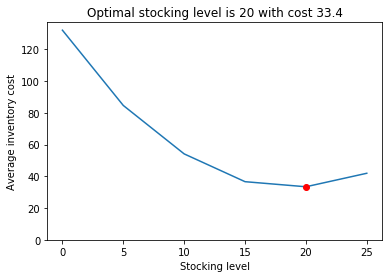

In [43]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,cost=optBaseStock(levelList,demandList,underage,overage)

import matplotlib.pyplot as plt
levelList=sorted(levelList)
costList=[cost[level] for level in levelList]
plt.plot(levelList,costList)
plt.plot([bestLevel],[cost[bestLevel]],'ro')
plt.title(f'Optimal stocking level is {bestLevel} with cost {round(cost[bestLevel],2)}')
plt.xlabel('Stocking level')
plt.ylabel('Average inventory cost')
plt.ylim(bottom=0)
plt.show()

In [7]:
# Sample run
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,avCost=optBaseStock(levelList,demandList,underage,overage)
print('bestLevel:',bestLevel)
print('avCost:',avCost)

bestLevel: 20
avCost: {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}


The following code illustrates how the results might be graphed as in Exercise 4.3. 

**Remember that due to a bug in Jupyter notebook, the first graph might need to be run twice in order to show.**

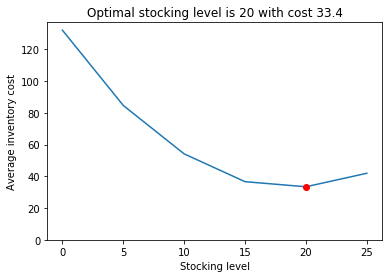

In [17]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,cost=optBaseStock(levelList,demandList,underage,overage)

import matplotlib.pyplot as plt
levelList=sorted(levelList)
costList=[cost[level] for level in levelList]
plt.plot(levelList,costList)
plt.plot([bestLevel],[cost[bestLevel]],'ro')
plt.title(f'Optimal stocking level is {bestLevel} with cost {round(cost[bestLevel],2)}')
plt.xlabel('Stocking level')
plt.ylabel('Average inventory cost')
plt.ylim(bottom=0)
plt.show()

## Q2. Simulating Availabilities of Hospital Beds

One challenge in health care operations is to forecast the number of hospital beds that are available at a given time, since patients admitted in the past may stay for several days and the number of beds are limited. If no more beds are available, then incoming patients may need to be turned away.

Write a function called `admissionSimulation` with three input arguments:

- `demandList`: a list of positive integers representing the number of incoming patients desiring a hospital bed in each day. (The first number corresponds to day 0, the second number to day 1, and so on.)
- `beds`: a positive integer representing the total number of hospital beds available.
- `stay`: a positive integer representing the number of days each admitted patient will stay. If `stay=1`, then every admitted patient leaves before any incoming patients arrive the next day. If `stay=2`, then each patient admitted on day $t$ will occupy a bed also for day $t+1$, and leave before incoming patients arrive on day $t+2$.

The function should return a list `admissionRecord`, corresponding to the number of incoming patients admitted on each day. 

**Sample run 1:**

```python
demandList=[1,2,1,0,2,3]
beds=2
stay=2
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')
```

**Correct output:**

```
Day	  Demand   Admitted
0	    1	    1
1	    2	    1
2	    1	    1
3	    0	    0
4	    2	    2
5	    3	    0
```

**Sample run 2:**

```python
demandList=[5,8,6,8,4,4,8,6,1]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')
```

**Correct output:**

```
Day	  Demand   Admitted
0	    5	    5
1	    8	    2
2	    6	    0
3	    8	    5
4	    4	    2
5	    4	    0
6	    8	    5
7	    6	    2
8	    1	    0
```

**Sample run 3:**

```python
# Sample run 3
demandList=[5,8,6,4,4,4,8,1,3]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')
```

**Correct output:**

```
Day      Demand   Admitted
0	    5    	5
1	    8	    2
2	    6	    0
3	    4	    4
4	    4	    3
5	    4	    0
6	    8	    4
7	    1	    1
8	    3	    2
```

**Hint:** In Step 2, you want to create a table. The above tables are insufficient to carry through the logic, as you also need to keep track of the number of discharges at the beginning of each day, as well as the number of available beds before new patients arrive.

### Applying Algorithmic Thinking:

**Step 1. Understand** (Write your summary of the task in this cell:)

The task is to create a log of count of the admitted patients each day. The number of patients admitted in each day depends on the availability of beds from previous day and also number of patients discharged on that day. The hospital has a maximum bed capacity of fixed quantity.

**Step 2. Decompose** (Write your instructions in this Markdown cell)

Create a table which has columns- day,demand,admitted,discharged,available
- day: day of the week(starting from 0)  
- demand: number of patients coming in each day(available as a list as input)
- admitted:Number of patients that can be admitted on each day.
        - it depends on the availability from previous day. Admitted= Min(Demand,Available)
- discharged: The count of patient getting discharged at the end of each day
        - it depends on the number of days of stay (available as input)
        - patients are discharged after stay-1 days
        - discharged count each day= Patients admitted at stay-1 days before
- available: beds available for admission of patients **next day**.
        - This is calculated each day as: Available(from previous day)-Admitted+Discharged (all values for that day)
        - This available value is used next day to calculate how many patients could be admitted

**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps)

In [109]:
demandList=[5,8,6,4,4,4,8,1,3]
beds=7
stay=3

In [114]:
import pandas as pd
table=pd.DataFrame()
table["Demand"]=demandList
table["Admitted"]=0
table["Discharged"]=0
table["Available"]=0
# table

In [115]:
for day in range(0, len(demandList)):
    if day == 0:
        table.loc[day, "Admitted"] = min(table.loc[0, "Demand"], beds)
        table.loc[day, "Available"] = max(0, beds - table.loc[0, "Admitted"])
    else:
        if day >= stay-1 :
            table.loc[day, "Discharged"] = table.loc[day - stay +1 , "Admitted"]
        else:
            table.loc[day, "Discharged"] = 0
        table.loc[day, "Admitted"] = min(table.loc[day, "Demand"],
                                         table.loc[day - 1, "Available"])
        table.loc[day, "Available"] = max(
            0, table.loc[day - 1, "Available"] - table.loc[day, "Admitted"] + table.loc[day, "Discharged"])
table


,Demand,Admitted,Discharged,Available
0,5,5,0,2
1,8,2,0,0
2,6,0,5,5
3,4,4,2,3
4,4,3,0,0
5,4,0,4,4
6,8,4,3,3
7,1,1,0,2
8,3,2,4,4


**Step 4. Synthesize** (Combine your code fragments from Step 3, but do so in an incremental fashion and print intermediate results)

In [116]:
# Version for debugging: with intermediate printing and no function encapsulation
demandList=[5,8,6,4,4,4,8,1,3]
beds=7
stay=3
import pandas as pd
table=pd.DataFrame()
table["Demand"]=demandList
table["Admitted"]=0
table["Discharged"]=0
table["Available"]=0

for day in range(0, len(demandList)):
    if day == 0:
        table.loc[day, "Admitted"] = min(table.loc[0, "Demand"], beds)
        table.loc[day, "Available"] = max(0, beds - table.loc[0, "Admitted"])
    else:
        if day >= stay-1 :
            table.loc[day, "Discharged"] = table.loc[day - stay +1 , "Admitted"]
        else:
            table.loc[day, "Discharged"] = 0
        table.loc[day, "Admitted"] = min(table.loc[day, "Demand"],
                                         table.loc[day - 1, "Available"])
        table.loc[day, "Available"] = max(
            0, table.loc[day - 1, "Available"] - table.loc[day, "Admitted"] + table.loc[day, "Discharged"])
table


,Demand,Admitted,Discharged,Available
0,5,5,0,2
1,8,2,0,0
2,6,0,5,5
3,4,4,2,3
4,4,3,0,0
5,4,0,4,4
6,8,4,3,3
7,1,1,0,2
8,3,2,4,4


In [1]:
# Final code: removing intermediate printing and encapuslating in a function
def admissionSimulation(demandList,beds,stay):
    admitted = [0 for x in demandList]
    discharged = [0 for x in demandList]
    available = [0 for x in demandList]

    for day in range(0, len(demandList)):
        if day == 0:
            admitted[day]=min(demandList[day], beds)
            available[day]=max(0,beds - admitted[day])
        else:
            if day >= stay-1 :
                discharged[day]=admitted[day-stay+1]
            else:
                discharged[day] = 0
            admitted[day] = min(demandList[day],available[day-1])
            available[day] = max(0, available[day-1] - admitted[day] + discharged[day])
    return admitted


In [4]:
# Sample run 1
demandList=[1,2,1,0,2,3]
beds=2
stay=2
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')

Day	Demand	Admitted
0	1	1
1	2	1
2	1	1
3	0	0
4	2	2
5	3	0


In [5]:
# Sample run 2
demandList=[5,8,6,8,4,4,8,6,1]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')

Day	Demand	Admitted
0	5	5
1	8	2
2	6	0
3	8	5
4	4	2
5	4	0
6	8	5
7	6	2
8	1	0


In [6]:
# Sample run 3
demandList=[5,8,6,4,4,4,8,1,3]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')

Day	Demand	Admitted
0	5	5
1	8	2
2	6	0
3	4	4
4	4	3
5	4	0
6	8	4
7	1	1
8	3	2
